# APIs Lab
In this lab we will practice using APIs to retrieve and store data.

In [96]:
# Imports at the top
import json
import urllib
import pandas as pd
import numpy as np
import requests
import json
import re
import matplotlib.pyplot as plt
%matplotlib inline

## Exercise 1: Get Data From Sheetsu

[Sheetsu](https://sheetsu.com/) is an online service that allows you to access any Google spreadsheet from an API. This can be a very powerful way to share a dataset with colleagues as well as to create a mini centralized data storage, that is simpler to edit than a database.

A Google Spreadsheet with Wine data can be found [here]().

It can be accessed through sheetsu API at this endpoint: https://sheetsu.com/apis/v1.0/dab55afd

Questions:

1. Use the requests library to access the document. Inspect the response text. What kind of data is it?
> Answer: it's a JSON string
- Check the status code of the response object. What code is it?
> 200
- Use the appropriate libraries and read functions to read the response into a Pandas Dataframe
> Possible answers include: pd.read_json and json.loads + pd.Dataframe
- Once you've imported the data into a dataframe, check the value of the 5th line: what's the price?
> 6

In [97]:
url = 'http://www.omdbapi.com/?'
r = requests.get(url)

In [98]:
r.status_code

200

In [100]:
r 

ValueError: No JSON object could be decoded

In [99]:
df = pd.DataFrame(r.json())
df 

ValueError: No JSON object could be decoded

In [75]:
df.describe()

,Color,Consumed In,Country,Grape,Name,Price,Region,Score,Vintage,Vinyard
count,74,74,72,20,65,68,73,73,74,32
unique,4,8,6,15,29,18,21,9,9,28
top,R,2015,US,sauvignon blanc,My wonderful wine,200,Sonoma,10,1973,Truro Vineyards
freq,58,58,55,4,33,43,41,43,41,2


### Exercise 2: Post Data to Sheetsu
Now that we've learned how to read data, it'd be great if we could also write data. For this we will need to use a _POST_ request.

1. Use the post command to add the following data to the spreadsheet:

In [38]:
post_data = {
'Grape' : ''
, 'Name' : 'Dope Wines'
, 'Color' : 'Robin Hood'
, 'Country' : 'US'
, 'Region' : 'Sonoma'
, 'Vinyard' : ''
, 'Score' : '10'
, 'Consumed In' : '2015'
, 'Vintage' : '1973'
, 'Price' : '200'
}

In [37]:
url

'https://sheetsu.com/apis/v1.0/dab55afd'

1. What status did you get? How can you check that you actually added the data correctly?
- In this exercise, your classmates are adding data to the same spreadsheet. What happens because of this? Is it a problem? How could you mitigate it?

In [39]:
requests.post(url=url, data=post_data)

<Response [201]>

## Exercise 3: Data munging

Get back to the dataframe you've created in the beginning. Let's do some data munging:

1. Search for missing data
    - Is there any missing data? How do you deal with it?
    - Is there any data you can just remove?
    - Are the data types appropriate?
- Summarize the data 
    - Try using describe, min, max, mean, var

In [65]:
df2 = df.replace(to_replace="",value = np.NaN)
df = df2.dropna()

In [68]:
df.Price = df['Price'].astype(float, inplace=True)

In [71]:
df.shape

(10, 10)

In [72]:
df

,Color,Consumed In,Country,Grape,Name,Price,Region,Score,Vintage,Vinyard
10,R,2015,Italy,sangiovese,Rosso Dei Poggi,12.0,Tuscany,3,2012,Rosso Dei Poggi
13,R,2015,Italy,sangiovese,Rosso Di Montalcino,15.0,Tuscany,3.5,2012,Ridolfi
14,W,2013,France,sauvignon blanc,Sancerre Cuvee Des Moulins Bales,12.0,Loire,3,2012,Celestin Blobdeau
15,R,2013,US,pinot noir,Meiomi,13.0,Napa,3,2012,Belle Glos
18,W,2014,US,sauvignon blanc,Sauvignon Blanc,14.5,Nappa,4,2012,Honig
19,W,2014,US,sauvignon blanc,Uppercut North Coast,11.0,Nappa,3,2012,Provenance
22,W,2014,US,pinot griogio,Pinot Grigio,10.0,Truro,3,2013,Truro Vineyards
27,W,2015,France,"Chablis, Vincent Dampt, Vaillons 1er (Burgundy...",Vincent Dampt,35.0,Burgundy,4,2012,Vaillons
28,W,2015,Spain,"Albarino, Granbazan (Rias Baixas) 2012",Albarino,15.0,Rias Baixas,4,2012,Granbazan
68,R,large quantities,US,grape drank,My wonderful wine,200.0,Sonoma,10,1973,Top of the line wine


## Exercise 4: Feature Extraction

We would like to use a regression tree to predict the score of a wine. In order to do that, we first need to select and engineer appropriate features.

- Set the target to be the Score column, drop the rows with no score
- Use pd.get_dummies to create dummy features for all the text columns
- Fill the nan values in the numerical columns, using an appropriate method
- Train a Decision tree regressor on the Score, using a train test split:
        X_train, X_test, y_train, y_test, = train_test_split(X, y, test_size=0.3, random_state=42)
- Plot the test values, the predicted values and the residuals
- Calculate R^2 score
- Discuss your findings


## Exercise 5: IMDB Movies

Sometimes an API doesn't provide all the information we would like to get and we need to be creative.
Here we will use a combination of scraping and API calls to investigate the ratings and gross earnings of famous movies.

## 5.a Get top movies

The Internet Movie Database contains data about movies. Unfortunately it does not have a public API.

The page http://www.imdb.com/chart/top contains the list of the top 250 movies of all times. Retrieve the page using the requests library and then parse the html to obtain a list of the `movie_ids` for these movies. You can parse it with regular expression or using a library like `BeautifulSoup`.

**Hint:** movie_ids look like this: `tt2582802`

## 5.b Get top movies data

Although the Internet Movie Database does not have a public API, an open API exists at http://www.omdbapi.com.

Use this API to retrieve information about each of the 250 movies you have extracted in the previous step.
- Check the documentation of omdbapi.com to learn how to request movie data by id
- Define a function that returns a python object with all the information for a given id
- Iterate on all the IDs and store the results in a list of such objects
- Create a Pandas Dataframe from the list

## 5.c Get gross data

The OMDB API is great, but it does not provide information about Gross Revenue of the movie. We'll revert back to scraping for this.

- Write a function that retrieves the gross revenue from the entry page at imdb.com
- The function should handle the exception of when the page doesn't report gross revenue
- Retrieve the gross revenue for each movie and store it in a separate dataframe

## 5.d Data munging

- Now that you have movie information and gross revenue information, let's clean the two datasets.
- Check if there are null values. Be careful they may appear to be valid strings.
- Convert the columns to the appropriate formats. In particular handle:
    - Released
    - Runtime
    - year
    - imdbRating
    - imdbVotes
- Merge the data from the two datasets into a single one

## 5.d Text vectorization

There are several columns in the data that contain a comma separated list of items, for example the Genre column and the Actors column. Let's transform those to binary columns using the count vectorizer from scikit learn.

Append these columns to the merged dataframe.

**Hint:** In order to get the actors name right, you'll have to modify the `token_pattern` in the `CountVectorizer`.

## Bonus:

- What are the top 10 grossing movies?
- Who are the 10 actors that appear in the most movies?
- What's the average grossing of the movies in which each of these actors appear?
- What genre is the oldest movie?


In [93]:
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.externals.six import StringIO
iris = load_iris()
clf = tree.DecisionTreeClassifier()
clf = clf.fit(iris.data, iris.target)
with open("iris.dot", 'w') as f:
    f = tree.export_graphviz(clf, out_file=f)

In [86]:
import os


In [91]:
from sklearn.externals.six import StringIO  
import pydot 
dot_data = StringIO() 
tree.export_graphviz(clf, out_file=dot_data) 
graph = pydot.graph_from_dot_data(dot_data.getvalue()) 
graph.write_pdf("iris.pdf") 

True

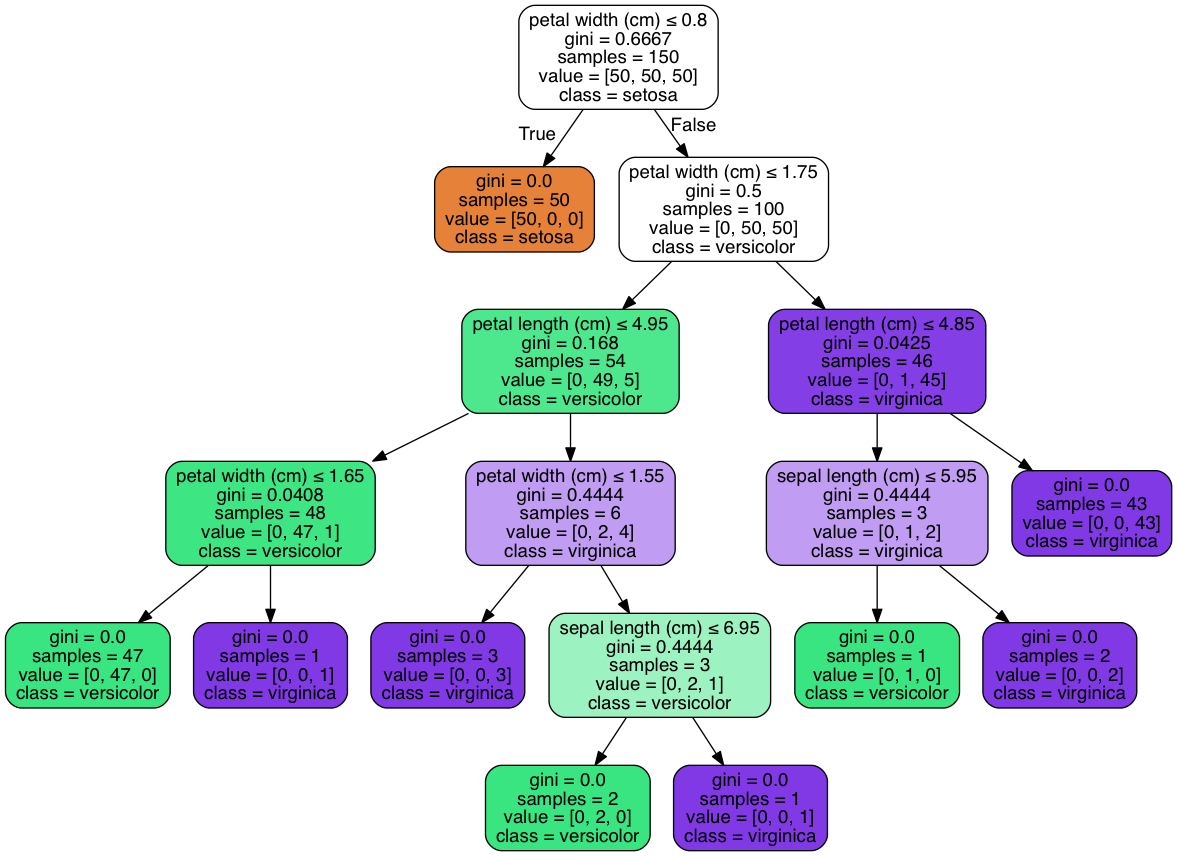

In [95]:
from IPython.display import Image 
import pydot
dot_data = StringIO()  
tree.export_graphviz(clf, out_file=dot_data,  
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png()) 